In [1]:
from blueqat import photonqat as pq

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Photonqat

基本的なゲート動作と測定を一通り行っています。

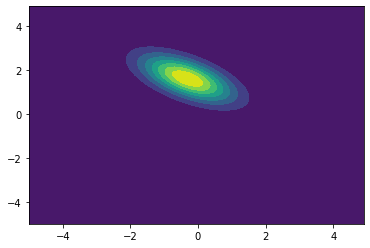

measured x = 0.9122641808311361
mu0 = [-0.31064074  1.61126221]
cov0 = [[ 0.79001283 -0.38079708]
 [-0.38079708  0.5       ]]


In [3]:
G = pq.Gaussian(2) # two qumode [0, 1]
G.D(0, 2) # Displacement gate, x to x+2
G.S(0, 1) # X squeeIng gate, r=1
G.R(0, np.pi/4) # pi/4 rotation gate
G.BS(0, 1, np.pi/4) # 50:50 beam splitter
G.MeasX(1) # Measure mode 1
G.run()
G.Wigner(0) # plot
print('measured x =', G.Creg(1, "x").read())
print('mu0 =', G.mean(0)) # mu of qumode 0
print('cov0 =', G.cov(0)) # covarince of qumode 1

## Method chain is available

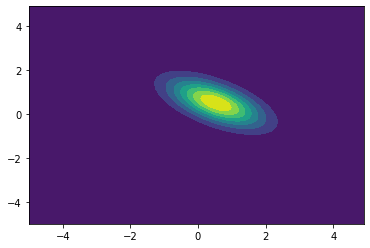

measured x = -0.5389456671834552
mu0 = [0.53109821 0.50602927]
cov0 = [[ 0.79001283 -0.38079708]
 [-0.38079708  0.5       ]]


In [4]:
G = pq.Gaussian(2).D(0, 2).S(0, 1).R(0, np.pi/4).BS(0, 1, np.pi/4)
G.MeasX(1).run()
G.Wigner(0) # plot
print('measured x =', G.Creg(1, "x").read())
print('mu0 =', G.mean(0)) # mu of qumode 0
print('cov0 =', G.cov(0)) # covarince of qumode 1

## 以下、メモ

## Phase space について

N bosonic mode Hilbert space  
$\otimes^{N}_{k=1} \mathcal{H}_k$

vectorial operator  
$\hat{\mathbf{b}} = (\hat{a}_1, \hat{a}_1^{\dagger}, \dots, \hat{a}_N, \hat{a}_N^{\dagger})$ : 2N elements

bosonic commutation relations  
$[\hat{b}_i, \hat{b}_j] = \Omega_{ij}\ \ (i, j = 1, \dots, 2N)$ 

$\mathbf{\Omega} = \oplus_{k=1}^{N}\omega\ \ \ 
\omega = 
\begin{pmatrix}
0 & 1 \\
-1 & 0 \\
\end{pmatrix}
$

Quadrature field  
$\hat{\mathbf{x}} = (\hat{q}_1, \hat{p}_1, \dots, \hat{q}_N, \hat{p}_N)$ : 2N elements

canonical commutation relation  
$[\hat{x}_i, \hat{x}_j] = 2i\Omega_{ij}\ \ (i, j = 1, \dots, 2N)$ 

## 密度演算子とWigner関数

任意の密度演算子$\hat{\rho}$を考える  

任意の密度演算子は等価なWigner関数が存在する

Weyl operator  
$D(\xi) = \exp(i \hat{x}^T \Omega \hat{\xi})$  

これを用いて、Wigner characteristic functionを定義できる  
$\chi (\xi) = \mathrm{Tr}[\hat{\rho}D(\xi)]$

Wigner characteristic functionのフーリエ変換がWigner function  
$W(\mathbf{x}) = \int_{R^{2N}} \frac{d^{2N}}{(2\pi)^{2N}} \exp{(-i \hat{x}^T \Omega \hat{\xi})} \chi (\xi)$

## 統計量とWigner関数

Wigner functionは統計量でも定義できる  

- first moment  
$\bar{\mathbf{x}} = \langle \hat{\mathbf{x}} \rangle= \mathrm{Tr}[\hat{\mathbf{x}} \hat{\rho}]$

- second moment  
$V_{ij} = \frac{1}{2}\langle \{\Delta\hat{x}_i, \Delta\hat{x}_j \}\rangle$  
$\{ A, B \} = AB+BA$

$V_{ii}$は$\hat{x}_i$の分散をあらわす

Gaussian stateは最初の2モーメントだけで完全に記述可能

## Gaussian Unitaryについて

Quadrature operatorにおいては、Gaussian UnitaryはAffien写像で書ける！  
$(\mathbf{S}, \mathbf{d}) : \hat{\mathrm{x}}\to \mathbf{S}\mathrm{x} + \mathbf{d}$

Williamson's Theorem  
任意の偶数次元の正定値実行列はsimplectic transformで対角化できる  
$\mathbf{V} = \mathbf{SV}^{\oplus}\mathbf{S}^{T}$  
$\mathbf{V}^{\oplus} = \oplus^{N}_{k=1} \nu_k \mathbf{I}$

## Gaussian Measurement  

POVM: $\Pi_i = E_{i}^{\dagger}E_i\ \ \ (\sum_i E_{i}^{\dagger}E_i = I)$  
これを連続量に置き換える  

Gaussian Measurementとは、Gaussian stateに対して行い、出力結果がGaussian Distributionで、測定しなかったモードはGaussian stateのままである

測定するsubsystemを$\mathbf{B}$として、それ以外のsubsystemを$\mathbf{A}$とする。

測定結果の確率分布：測定モード以外の直交位相を周辺化したGaussian Wigner分布  
測定後の状態：以下のようになる.


$\mathbf{V} = \mathbf{A} - \mathbf{C}(\mathbf{\Pi B \Pi})^{-1}\mathbf{C}^T$  
$\mathbf{\Pi} = \rm{diag}(1, 0)$     ($\hat{x}$測定の場合)

$\mathbf{\Pi B \Pi}$は非正則。pseudo-inverseを用いる。  
$(\mathbf{\Pi B \Pi})^{-1} = B_{11}^{-1}\Pi$

これは多変量ガウス分布の条件付き分布をとるのと基本的に同じ  
なので同様に測定後の状態の平均もとれる

$\mathbf{\mu} = \mathbf{\mu_A} - \mathbf{C}(\mathbf{\Pi B \Pi})^{-1}(\mathbf{\mu_B} - x_B\mathbf{\Pi})$